CURSO: Análisis Geoespacial (Sem02-2019)                                                                                   
Profesor: Edier Aristizábal (evaristizabalg@unal.edu.co)                                                                   
Curso website: https://unvirtual.medellin.unal.edu.co/course/view.php?id=579

# 15: Regresión Lineal

La Regresión Lineal (RL) asume que las variables predictoras tienen una distribución Gaussiana y que no son correlacionables, por lo tanto es importante en el análisis de datos explorar estas condiciones. Adicionalmente, hay que tener en cuenta que los modelos de RL son modelos geométricos, es decir que se basan en calcular las distancias entre la predicción y los datos reales, por lo tanto es importante normalizar o estandarizar los datos. 

In [ ]:
Para iniciar con la implementación de los modelos RL, primero se importan las librerías a utilizar.

In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

En este Taller utilizaremos la base de datos Boston disponible en la librería Sklearn para problemas de regresión. Por lo tanto la cargamos, separamos en datos de entrenamiento y datos de validación con un 30%, y definimos como variables predictoras *X*, y variable dependiente *y*.

In [3]:
from sklearn.datasets import load_boston
boston=load_boston()
X=boston.data
y=boston.target
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

## Método OLS de la librería *statsmodels*

Aunque la librería mas completa para *machine learning* en Python es Sklearn, existen otras librerías con funciones interesantes, un ejemplo es la librería *statsmodels*. Esta librería permite para los modelos RL obtener un resumen de la implementación del modelo muy útil. A continuación se detalla.

Se importa la librearía como *sm*. Para su implementación, a diferencia de Sklearn, se entrena y posteriormente se aplica la función *fit*. 

Finalmente, podemos imprimir con la función *summary* el resultado de la implementación, con métricas muy importantes que permiten conocer el ajuste a los datos.

In [5]:
import statsmodels.api as sm
lm=sm.OLS(y_train, x_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     634.0
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          8.27e-230
Time:                        14:35:23   Log-Likelihood:                -1064.2
No. Observations:                 354   AIC:                             2154.
Df Residuals:                     341   BIC:                             2205.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1168      0.043     -2.735      0.0

Es posible obtener los valores de Y con el modelo entrenado, utilizando los datos de entrenamiento y los datos de validación. Ademas se puede comparar visualmente el ajuste con los datos reales de validación y las predicciones con los datos de validación.

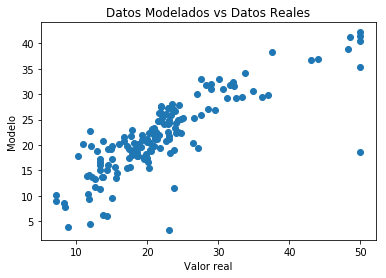

In [7]:
y_train_pred=lm.predict(x_train)
y_test_pred=lm.predict(x_test)
plt.scatter(y_test,y_test_pred)
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real')
plt.ylabel('Modelo');

El error residual, es decir la diferencia entre los datos de predicción y los datos reales, se distribuye de la siguiente manera para este ejemplo.

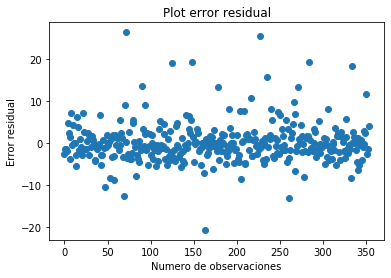

In [28]:
plt.plot(lm.resid,'o')
plt.title('Plot error residual')
plt.xlabel('Número de observaciones')
plt.ylabel('Error residual');

El histograma señala un distribución parecida a normal, lo cual es importante en los modelos de RL.

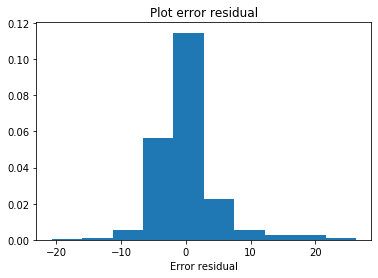

In [31]:
plt.hist(lm.resid, density=True)
plt.title('Plot error residual')
plt.xlabel('Error residual');

A continuación se calcula algunas métricas utilizadas en los problemas de regresión, tanto para los datos de entrenamiento, como para los datos de validación. Lo cual permite observar si el modelo presenta problemas de *Bias* o de *overfitting*.

In [13]:
print('TRAIN MAE:',mean_absolute_error(y_train,y_train_pred))
print('TEST MAE:',mean_absolute_error(y_test,y_test_pred))

TRAIN MAE: 3.190239003672459
TEST MAE: 3.5275507110072293


In [16]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 4.859808687822449
Test RMSE: 5.119951174205673


In [ ]:
print('R2 Train:',lm.rsquared(y_train,y_train_pred))
print('R2 Test:',lm.rsquared(y_test,y_test_pred))

## Regresión Lineal con Sklearn

Para implementar los problemas de RL con Sklearn se utiliza el siguiente procedimiento.

In [ ]:
from sklearn.linear_model import LinearRegression

Se instancia el modelo a utilizar, en este caso *LinearRegression* se ajusta a los datos, y finalmente se aplica a los datos de validación para la predicción y conocer el ajuste. Como resultados se pueden obtener el intercepto y los coeficientes de cada variable predictora.

In [51]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Intercepto:',model.intercept_)
print('Coeficientes:',model.coef_)

Intercepto: 34.33409594393511
Coeficientes: [-9.41252682e-02  5.72941297e-02 -1.17959446e-03  2.75352371e+00
 -1.89792057e+01  3.85440454e+00 -5.66414331e-03 -1.54908014e+00
  2.54555049e-01 -7.83084350e-03 -8.93916242e-01  1.03079632e-02
 -4.83491114e-01]


Algunas métricas que se pueden implementar desde *Sklearn* son:

In [52]:
print('R2:',model.score(x_test,y_test))
print('R2:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2: 0.7634955906523349
R2: 0.7634955906523349
MSE: 23.534284246784058
MAE: 3.4467610795433186


También se puede obtener el ajuste visual.

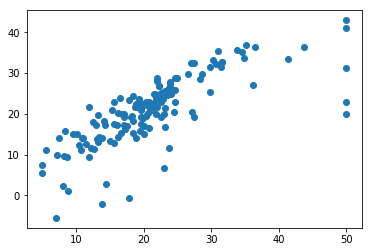

In [20]:
plt.scatter(y_test,y_pred)
plt.title('Datos Modelados vs Datos Reales')
plt.xlabel('Valor real')
plt.ylabel('Modelo');

Con los datos de entrenamiento se puede implementar el *cross validation* y conocer el ajuste del modelo y su varianza.

In [53]:
kfold = KFold(n_splits=5, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
print(results)
print(results.mean())

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.35327592439588124


Se obtiene como promedio un valor muy bajor, pero es debido a su gran dispersión. Lo cual se puede observar cuando se modifica el número de *split*.

In [54]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results)
print(results.mean())

[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
0.2025289900605492


A continuación se presentan los dos modelos de RL con penalización mas conocidos, denominados Lasso (L1) y Ridge (L2).

# Regularización

Uno de las herramientas para reducir los problemas de *overfitting* se refieren a la regularización. En los siguientes ejemplos vamos a observar la aplicación de los métodos de Ridge y Lasso, y el comportamiento del hiperparámetro Lamba para ambos casos.

Inicialmente importamos las librerías:

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

Vamos a trabajar con la base de datos de Sklearn denominada *boston*.

In [5]:
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [6]:
lr=LinearRegression()
lr.fit(X, y)
lr_score = lr.score(X,y)
print('Linear regression score:', lr_score)

Linear regression score: 0.7406077428649427


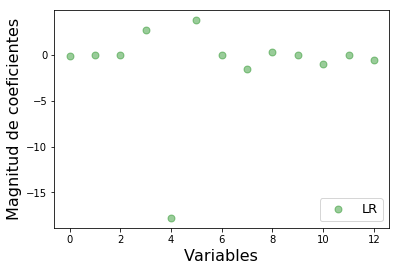

In [8]:
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='LR')
plt.xlabel('Variables',fontsize=16)
plt.ylabel('Magnitud de coeficientes',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [9]:
print(lr.coef_)

[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


En la figura y matriz anterior se observan los pesos de las 13 variables obtenidas por métodos de regresión linear sin ningún tipo de penalización.

A continuación se implementarán sobre los mismos datos el modelo Ridge y Lasso, los cuales penalizan a traves del hiperparámetro lambda los pesos de cada una de las variables.

### Ridge regression

In [11]:
rr001 = Ridge(alpha=0.01)
rr001.fit(X, y)
Ridge_score_001 = rr001.score(X,y)
print('Ridge score_001:', Ridge_score_001)

rr = Ridge()
rr.fit(X, y)
Ridge_score = rr.score(X,y)
print('Ridge score_1:', Ridge_score)

rr100 = Ridge(alpha=100)
rr100.fit(X, y)
Ridge_score_100 = rr100.score(X,y)
print('Ridge score_100:', Ridge_score_100)


Ridge score_001: 0.7406072669874482
Ridge score_1: 0.7388294987673955
Ridge score_100: 0.7178124385677699


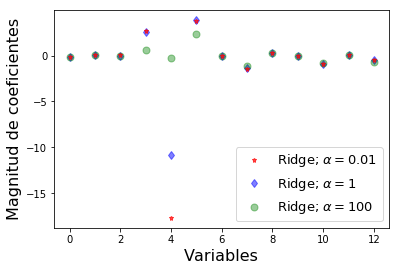

In [13]:
plt.plot(rr001.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 1$') # alpha here is for transparency
plt.plot(rr100.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label=r'Ridge; $\alpha = 100$')
plt.xlabel('Variables',fontsize=16)
plt.ylabel('Magnitud de coeficientes',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

En la figura anterior del modelo Ridge. en el eje X están los índices de los coeficientes, el modelo tiene 13 variables iniciales. Para valores bajos de lambda (0.01), cuando los coeficientes son menos restringidos, la magnitud de los coeficientes es casi similar que para el modelo normal de regresión lineal. Para valores grandes (100), los coeficientes 3, 4 y 5 la magnitud es considerablemente menor comparada al modelo de regresión linear.

A continuación se implementa el modelo *ridge* utilizando la separación simple *train_test* y el *cross validation* para observar la diferencia de resultados entre los coeficientes y el ajuste con la RL normal y *Lasso*. En todos estos casos se utiliza por defecto un valor de *lambda* = 1. Los modelos de RL normal corresponde a cualquiera de los dos métodos, pero con un valor de *lambda*=0. Utilizando la curva de validación se puede obtener el valor óptimo que mejora el ajuste del modelo.

In [60]:
from sklearn.linear_model import Ridge
model = Ridge()

In [61]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Intercepto:',model.intercept_)
print('Coeficientes:',model.coef_)
print('R2:',r2_score(y_test,y_pred))

Intercepto: 28.0262752082101
Coeficientes: [-8.97936349e-02  5.79959042e-02 -3.81952780e-02  2.59403049e+00
 -9.74745413e+00  3.90387030e+00 -1.43145582e-02 -1.41260458e+00
  2.35286370e-01 -8.70813283e-03 -7.99505049e-01  1.09316575e-02
 -4.89264002e-01]
R2: 0.7628736799283028


In [62]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results)
print(results.mean())

[ 0.66089569  0.74094893  0.62923672  0.08530169 -0.17029513]
0.38921758241023985


Se observa un mayor ajuste con la separación simple, pero existe una gran varianza en los datos.

### LASSO Regression

Este tipo de regularización (L1) puede reducir completamente la importancia de las variables hasta 0, por lo tanto no solamente se utiliza para reducir el sobreajuste en un modelo, sino ademas como método de selección de variables.. El parémetro por defecto de la regularización Lasso es 1. 

A continuación se implementará el modelo Lasso.

In [16]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X,y)
lasso_score001=lasso001.score(X,y)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("Lasso score para alpha=0.01 es", lasso_score001) 
print ("Número de variables utilizadas para alpha =0.01:", coeff_used001)
print(lasso001.coef_)

lasso = Lasso()
lasso.fit(X,y)
lasso_score_1=lasso.score(X,y)
coeff_used = np.sum(lasso.coef_!=0)
print ("Lasso score para alpha=1 es", lasso_score_1) 
print ("Número de variables utilizadas para alpha =1: ", coeff_used)
print(lasso.coef_)

lasso100 = Lasso(alpha=100, max_iter=10e5)
lasso100.fit(X,y)
lasso_score100=lasso100.score(X,y)
coeff_used100 = np.sum(lasso100.coef_!=0)
print ("Lasso score para alpha=100 es", lasso_score100) 
print ("Número de variables utilizadas para alpha =100:", coeff_used100)
print(lasso100.coef_)

Lasso score para alpha=0.01 es 0.7401747367311462
Número de variables utilizadas para alpha =0.01: 13
[-1.05330983e-01  4.68329072e-02  6.77570009e-03  2.50607938e+00
 -1.44226291e+01  3.80918476e+00 -1.76057409e-03 -1.42229358e+00
  2.98099885e-01 -1.26220655e-02 -9.17066833e-01  9.56558992e-03
 -5.31194326e-01]
Lasso score para alpha=1 es 0.6825494617506651
Número de variables utilizadas para alpha =1:  10
[-0.06342255  0.04916867 -0.          0.         -0.          0.94678567
  0.02092737 -0.66900864  0.26417501 -0.01520915 -0.72319901  0.00829117
 -0.76143296]
Lasso score para alpha=100 es 0.22497922550751603
Número de variables utilizadas para alpha =100: 2
[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.02097192 -0.          0.00446643
 -0.        ]


En el caso anterior, cuando se incrementa el valor de lambda a 100, los pesos de los parámetros se reducen de tal forma que solo dos variables (11 y 12) permanecen con valores ligéramente diferentes a 0.

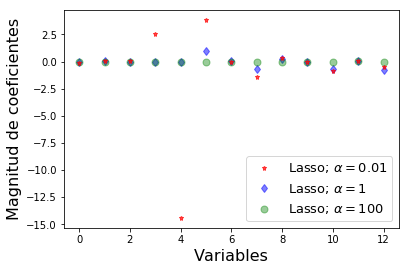

In [15]:
plt.plot(lasso001.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 1$') # alpha here is for transparency
plt.plot(lasso100.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label=r'Lasso; $\alpha = 100$')
plt.xlabel('Variables',fontsize=16)
plt.ylabel('Magnitud de coeficientes',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

De forma similar se implementa el RL tipo *lasso*.

In [63]:
from sklearn.linear_model import Lasso
model = Lasso()

In [65]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Intercepto:',model.intercept_)
print('Coeficientes:',model.coef_)
print('R2:',r2_score(y_test,y_pred))

Intercepto: 38.202168185895495
Coeficientes: [-0.03790178  0.0608616  -0.0045888   0.         -0.          1.007868
  0.01097365 -0.78931757  0.21562959 -0.0116075  -0.63992023  0.00979854
 -0.73309521]
R2: 0.715480373563341


In [64]:
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results)
print(results.mean())

[0.56156843 0.63385562 0.33456629 0.35466066 0.27459294]
0.431848787926522


Similares resultados en términos de varianza para el modelo *lasso*, sin embargo se observa un valor mayor de ajuste para la *cross validation*. en este aso es muy importante elaborar la curva de entrenamiento y entender como el modelo aprende de acuerdo con los datos.